In [1]:
import utils
import settings
import pickle
import numpy as np

In [2]:
import corner

In [3]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', size=14)
plt.rc('legend', fontsize=13)

In [4]:
# important components (we only really care about water, cloud, snow)
selected_idx = [settings.labels.index(component)
                for component in settings.CLASSIFYING_COMPONENTS]

In [5]:
settings.CLASSIFYING_COMPONENTS

['seawater', 'snow', 'cloud']

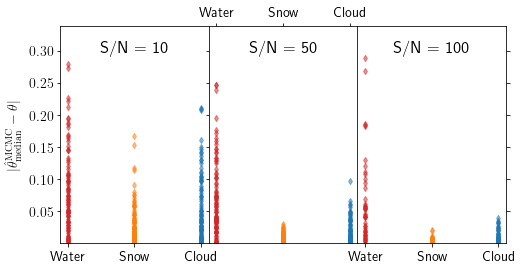

In [63]:
fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(8,4))
min_val, max_val = 0,0
for j, snr in enumerate([10 ,50, 100]):
    true_thetas, chains = pickle.load(open(f'{settings.OUTPUT_DIR}/MCMC_SNR_{snr}_true_and_chains.pkl', 'rb'))
    
    median_arr = np.zeros((len(chains), len(selected_idx)))
    true_theta_arr = np.zeros((len(chains), len(selected_idx)))
    
    theta_diff = np.zeros((len(chains), len(selected_idx)))
    theta_upper_diff = np.zeros((len(chains), len(selected_idx)))
    theta_lower_diff = np.zeros((len(chains), len(selected_idx)))
    
    for i, chain in enumerate(chains):
        # only get chains for variables we care about
        chain_selected = chain[:,selected_idx]
        # get estimators
        lower, median, upper = np.percentile(chain_selected, [2.5, 50, 97.5], axis=0)
        median_arr[i] = median
        # get true values
        true_theta = true_thetas[i,selected_idx]
        true_theta_arr[i] = true_theta
        # get diff
        theta_diff[i] = np.abs(true_theta - median)
        theta_upper_diff[i] = np.abs(upper - median - true_theta)
        theta_lower_diff[i] = np.abs(median - lower - true_theta)

        # plt.figure()
        # fig = corner.corner(
        #     chain_selected, labels=settings.CLASSIFYING_COMPONENTS, truths=true_theta,
        #     quantiles=[0.025, 0.5, 0.975]);
    
    all_labels = np.array([['Water', 'Snow', 'Cloud']]*len(chains))
    min_val, max_val = np.min(theta_diff), np.max(theta_diff)
    ax = axes[j]
    for i in range(all_labels.shape[1]):
        # ax.errorbar(all_labels[:,i], theta_diff[:,i], 
        #             yerr = (theta_lower_diff[:,i], theta_upper_diff[:,i]),
        #             marker='o', alpha=0.5, capsize=4)
        ax.scatter(all_labels[:,i], theta_diff[:,i], 
            marker='d', alpha=0.5, s=20,
            c=settings.color_list[i])
        # ax.set_yscale('log')
        if j == 1: ax.xaxis.tick_top()
        if j == 2: ax.yaxis.tick_right()
        ax.set_title(f'S/N = {snr}', y=0.85);
        # ax.set_ylim(1e-5, 0.5)
        # ax.set_ylim(0,0.3)
    plt.subplots_adjust(wspace = 0)
[ax.set_ylim(min_val, max_val+0.05) for ax in axes]
axes[0].set_ylabel(r' $| \hat{\theta}^\mathrm{MCMC}_{\mathrm{median}} - \theta |$');
fig.savefig('plots/MCMC_random_residual.pdf')

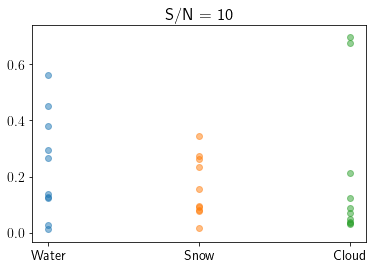

In [110]:
for i in range(all_labels.shape[1]):
    plt.scatter(all_labels[:,i], true_theta_arr[:,i], alpha=0.5)

plt.title(f'S/N = {snr}');

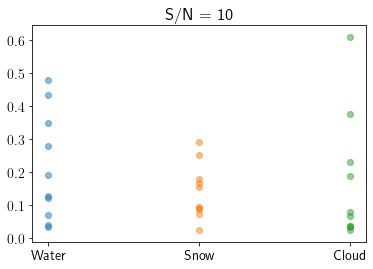

In [111]:
for i in range(all_labels.shape[1]):
    plt.scatter(all_labels[:,i], median_arr[:,i], alpha=0.5)

plt.title(f'S/N = {snr}');